## Getting Started with Batfish

This notebook uses pybatfish, a Python-based SDK for Batfish, to analyze a sample network. It shows how to submit your configurations and other network data for analysis and how to query its vendor-neutral network model. [Other notebooks](https://github.com/batfish/pybatfish/tree/master/jupyter_notebooks) show how to use Batfish for different types of network validation tasks. 

You can check out a video demo of this notebook [here](https://www.youtube.com/watch?v=Ca7kPAtfFqo).


from IPython.display import Audio,Image, YouTubeVideo
id='Ca7kPAtfFqo '
YouTubeVideo(id='Ca7kPAtfFqo',width=600,height=300)

### Initializing a Network and Snapshot

A *network* is a logical group of routers and links. It can be your entire network or a subset of it. A *snapshot* is a collection of information (configuration files, routing data, up/down status of nodes and links) that represent the network state. Snapshots can contain the actual state of the network or candidate states (e.g, those corresponding to a planned change) that you want to analyze.

![Analytics](https://ga-beacon.appspot.com/UA-100596389-3/open-source/pybatfish/jupyter_notebooks/getting-started?pixel&useReferer)**\*\*Make sure that the Batfish service is running locally before running the cells below.\*\***

In [9]:
from IPython.display import HTML
HTML('<iframe align="middle" width="560" height="315" src="https://www.youtube.com/embed/Ca7kPAtfFqo?rel=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

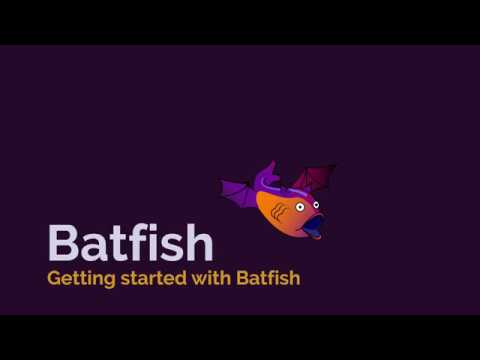

In [8]:
from IPython.display import Audio,Image, YouTubeVideo
id='Ca7kPAtfFqo '
YouTubeVideo(id='Ca7kPAtfFqo',width=600,height=300)

In [3]:
# Import pybatfish and other needed packages
%run startup.py

`SNAPSHOT_PATH` below can be updated to point to a custom snapshot directory, see the [Batfish instructions](https://github.com/batfish/batfish/wiki/Packaging-snapshots-for-analysis) for how to package data for analysis.<br>
More example networks are available in the [networks](https://github.com/batfish/batfish/tree/master/networks) folder of the Batfish repository.

In [2]:
# Assign a friendly name to your network and snapshot
NETWORK_NAME = "example_network"
SNAPSHOT_NAME = "example_snapshot"

SNAPSHOT_PATH = "networks/example"

# Now create the network and initialize the snapshot
bf_set_network(NETWORK_NAME)
bf_init_snapshot(SNAPSHOT_PATH, name=SNAPSHOT_NAME, overwrite=True)

'example_snapshot'

If you used the example we provided, the network you initialized above is illustrated below. You can download/view devices' configuration files [here](https://github.com/batfish/pybatfish/tree/master/jupyter_notebooks/networks/example).

![example-network](https://raw.githubusercontent.com/batfish/pybatfish/master/jupyter_notebooks/networks/example/example-network.png)

***

### Querying the Network Model

Batfish creates a comprehensive vendor-neutral device and network model which can be queried for information about devices, interfaces, VRFs, routes, etc. It offers a set of *questions*  to query this model.

In [3]:
# Load questions from Batfish
load_questions()

# To see available questions, you can use
# list_questions()

# You can also use tab-completion on the Batfish question module - bfq. -> press TAB key,
# uncomment and try on the following line
# bfq.

# In IPython and Jupyter you can use the "?" shorthand to get help on a question
?bfq.nodeProperties

# help(bfq.nodeProperties) # in standard Python console

***

### Getting status of parsed files

Batfish may ignore certain lines in the configuration. To retrieve the parsing status of snapshot files, use the `fileParseStatus()` question.

In [4]:
parse_status = bfq.fileParseStatus().answer().frame()

`answer()` runs the question and returns the answer in a JSON format. 

`frame()` wraps the answer as [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [5]:
# View the parse status results
parse_status

,File_Name,Status,Nodes
0,configs/as1border1.cfg,PASSED,[as1border1]
1,configs/as1border2.cfg,PASSED,[as1border2]
2,configs/as1core1.cfg,PASSED,[as1core1]
3,configs/as2border1.cfg,PASSED,[as2border1]
4,configs/as2border2.cfg,PASSED,[as2border2]
5,configs/as2core1.cfg,PASSED,[as2core1]
6,configs/as2core2.cfg,PASSED,[as2core2]
7,configs/as2dept1.cfg,PASSED,[as2dept1]
8,configs/as2dist1.cfg,PASSED,[as2dist1]
9,configs/as2dist2.cfg,PASSED,[as2dist2]


Additional post-processing can be done on this data, like filtering for values in one or multiple columns, reducing the number of columns, etc. using pandas. A tutorial on pandas-based filtering is [here](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.2/cookbook/Chapter%203%20-%20Which%20borough%20has%20the%20most%20noise%20complaints%20%28or%2C%20more%20selecting%20data%29.ipynb).

In [6]:
# An example: use a filter on the returned dataframe to see which files failed to parse completely
parse_status[parse_status['Status'] != 'PASSED']  # change '!=' to '==' to get the files which passed

,File_Name,Status,Nodes


In [7]:
# View details if some of the files were not parsed completely
parse_warning = bfq.parseWarning().answer().frame()

parse_warning

,Filename,Text,Line,Parser_Context,Comment


***
### Extracting properties of network entities
Entities in the network refer to things like nodes, interfaces, routing processes, and VRFs. Batfish makes it trivial to extract configured properties of such entities in a vendor neutral manner. 

##### Node properties
The nodeProperties question extracts information on nodes in the snapshot.

In [8]:
# Extract the properties of all nodes whose names match the regular expression '.*border.*'
node_properties = bfq.nodeProperties(nodes=".*border.*").answer().frame()

In [9]:
# View what columns (properties) are present in the answer
node_properties.columns

Index(['Node', 'IKE_Policies', 'VRFs', 'Logging_Source_Interface',
       'NTP_Servers', 'Zones', 'IP_Access_Lists', 'Vendor_Family',
       'Authentication_Key_Chains', 'TACACS_Source_Interface',
       'AS_Path_Access_Lists', 'IPSec_Proposals', 'IP6_Access_Lists',
       'Logging_Servers', 'Route6_Filter_Lists', 'DNS_Servers',
       'TACACS_Servers', 'Device_Type', 'IPSec_Policies', 'Hostname',
       'Domain_Name', 'IKE_Gateways', 'IPSec_Vpns', 'IP_Spaces', 'Interfaces',
       'Default_Cross_Zone_Action', 'Route_Filter_Lists',
       'Default_Inbound_Action', 'SNMP_Source_Interface', 'Routing_Policies',
       'Canonical_IP', 'NTP_Source_Interface', 'SNMP_Trap_Servers',
       'Configuration_Format', 'DNS_Source_Interface', 'Community_Lists'],
      dtype='object')

In [10]:
# To extract only a subset of properties, use the properties parameter
node_properties_trunc = bfq.nodeProperties(nodes=".*border.*", properties="Domain_Name|NTP_Servers|Interfaces").answer().frame()

node_properties_trunc

,Node,Interfaces,Domain_Name,NTP_Servers
0,as1border1,"[GigabitEthernet0/0, GigabitEthernet1/0, Ethernet0/0, Loopback0]",lab.local,[]
1,as2border1,"[GigabitEthernet0/0, GigabitEthernet1/0, GigabitEthernet2/0, Ethernet0/0, Loopback0]",lab.local,"[18.18.18.18, 23.23.23.23]"
2,as1border2,"[GigabitEthernet0/0, GigabitEthernet1/0, GigabitEthernet2/0, Ethernet0/0, Loopback0]",lab.local,"[18.18.18.18, 23.23.23.23]"
3,as3border2,"[GigabitEthernet0/0, GigabitEthernet1/0, Ethernet0/0, Loopback0]",lab.local,"[18.18.18.18, 23.23.23.23]"
4,as2border2,"[GigabitEthernet0/0, GigabitEthernet1/0, GigabitEthernet2/0, Ethernet0/0, Loopback0]",lab.local,[18.18.18.18]
5,as3border1,"[GigabitEthernet0/0, GigabitEthernet1/0, Ethernet0/0, Loopback0]",lab.local,"[18.18.18.18, 23.23.23.23]"


An alternative (client-side) way to restrict the list of columns displayed is to use pandas-based column filtering ([pandas tutorial](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.2/cookbook/Chapter%202%20-%20Selecting%20data%20%26%20finding%20the%20most%20common%20complaint%20type.ipynb)).

In [11]:
# Let's remove the interfaces column from our result
node_properties_trunc = node_properties_trunc[["Node", "Domain_Name", "NTP_Servers"]]

node_properties_trunc

,Node,Domain_Name,NTP_Servers
0,as1border1,lab.local,[]
1,as2border1,lab.local,"[18.18.18.18, 23.23.23.23]"
2,as1border2,lab.local,"[18.18.18.18, 23.23.23.23]"
3,as3border2,lab.local,"[18.18.18.18, 23.23.23.23]"
4,as2border2,lab.local,[18.18.18.18]
5,as3border1,lab.local,"[18.18.18.18, 23.23.23.23]"


You can add additional filters to restrict entries based on values of columns.

In [12]:
# View only nodes with **23.23.23.23** as one of the configured ntp-servers
node_properties_trunc[node_properties_trunc['NTP_Servers'].apply(lambda x:'23.23.23.23' in x)]

,Node,Domain_Name,NTP_Servers
1,as2border1,lab.local,"[18.18.18.18, 23.23.23.23]"
2,as1border2,lab.local,"[18.18.18.18, 23.23.23.23]"
3,as3border2,lab.local,"[18.18.18.18, 23.23.23.23]"
5,as3border1,lab.local,"[18.18.18.18, 23.23.23.23]"


#### Interface properties
To retrieve information about interfaces present and the properties of them, use the **interfaceProperties** question

In [13]:
interface_properties = bfq.interfaceProperties(nodes=".*border.*", properties="Interface_Type|Bandwidth|VRF|Primary_Address").answer().frame()

If you wanted to just find interfaces with the primary ip address in <b>10.12.0.0/16</b>, you can filter the results as shown below.

**na=False** is required in order to ignore interfaces without any configured IP addresses, such as ethernet switchports.


In [14]:
interface_properties[interface_properties['Primary_Address'].str.match("10.12", na=False)]

,Interface,Interface_Type,Bandwidth,VRF,Primary_Address
22,as2border1:GigabitEthernet0/0,PHYSICAL,1.000000e+09,default,10.12.11.2/24
26,as1border1:GigabitEthernet1/0,PHYSICAL,1.000000e+09,default,10.12.11.1/24


Similar questions extract properties of other entities (e.g., `bgpProperties()` extracts properties of BGP processes).

***
### Inspecting referential integrity of configuration structures
Network configuratons define and reference named structures like route maps, access control lists (ACLs), prefix lists, etc. Two common indicators of buggy configurations include references to structures that are not defined anywhere (which can lead to disastrous consequences on some platforms) or defined structures that are not referenced anywhere. Batfish makes it easy to flag such instances because it understand the underlying semantics of configuration.

In [15]:
# List references to undefined structures
bfq.undefinedReferences().answer().frame()

,File_Name,Struct_Type,Ref_Name,Context,Lines
0,configs/as2core2.cfg,route-map,filter-bogons,bgp inbound route-map,configs/as2core2.cfg:[109]


The question for listing any unused structures is `unusedStructures()`.

***
### Inspecting physical and logical topologies
Nodes in a network form multiple types of topologies that are defined by edges at layer 1 or layer 3 (IP layer) or by different types of routing protocols such as BGP or OSPF. The `edges()` question in Batfish returns these different types of edges. Its `edgeType` parameter specifies the type of edges to retrieve, and the `nodes` and `remoteNodes` parameters can be used to limit the returned edges to a subset of the nodes.

In [16]:
# Get edges of type layer 3 (IP layer)
bfq.edges(nodes="as1border1", edgeType="layer3").answer().frame()

,Interface,IPs,Remote_Interface,Remote_IPs
0,as1border1:GigabitEthernet0/0,[1.0.1.1],as1core1:GigabitEthernet1/0,[1.0.1.2]
1,as1border1:GigabitEthernet1/0,[10.12.11.1],as2border1:GigabitEthernet0/0,[10.12.11.2]


***
### Exploring Routing and Forwarding
Batfish computes routing and forwarding tables (aka RIBs and FIBs) of the network from snapshot data itself. These tables can be examined to understand the routing and forwarding behavior of the network. 

One way to examine this behavior is using a virtual traceroute. Unlike the live-network traceroute, Batfish shows all possible flow paths in the network and identifies routing entries that cause each hop to be taken.

In [17]:
# Do a traceroute from host1 to 1.0.2.2
tr_frame = bfq.traceroute(startLocation="host1", headers=HeaderConstraints(dstIps="1.0.2.2")).answer().frame()

# Display results using customizations to handle large string values
display_html(tr_frame)

Another way to understand the routing behavior in detail is to examine the routing tables directly. 

In [18]:
# Fetch the routing table of all VRFs on all nodes in the snapshot
routes_df = bfq.routes().answer().frame()

(For a large network, the first time you run a question that needs the dataplane, fetching the answer can take a few minutes. Subsequent questions are quick as the generated dataplane is saved by Batfish.)

As used above, the routes() question can generate a lot of results. You may restrict the output using parameters to the question---to restrict the results to **border** routers, use **nodes = "\.\*border\.\*"**. Or, you can use pandas for client-side filtering as below.

In [19]:
# View all routes for the network 90.90.90.0/24 with an AdminDistance of 0
routes_df[(routes_df['Network'] == "90.90.90.0/24") & (routes_df["Admin_Distance"] == 0)]

,Node,VRF,Network,Protocol,Next_Hop_IP,Next_Hop,Admin_Distance,Metric,Tag
101,as3core1,default,90.90.90.0/24,connected,AUTO/NONE(-1l),None,0,0,None
102,as3core1,default,90.90.90.0/24,connected,AUTO/NONE(-1l),None,0,0,None


***
That's it for now! Feel free to explore further by adding cells and running other questions, or play with [other notebooks](https://github.com/batfish/pybatfish/tree/master/jupyter_notebooks).